# Q1: Data Cleaning 

Importing all the libraries and packages needed for analysing. 

In [1]:
import os
import re
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download("wordnet")
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

import html
import collections
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import the data to dataframe 
gtweet= pd.read_csv('generic_tweets.txt', skiprows = 1, names=['class', 'id', 'date','query','user','text'])
usair_tweet= pd.read_csv('US_airline_tweets.csv',skiprows = 1, names=['id', 'sentiment','negative_reason','user','retweet_count','text'])                                    

In [3]:
# Extract the Tweets
gtweet_text = gtweet['text']
usair_tweet_text = usair_tweet['text']

In [4]:
def clean_file_text(file):
    
    wordlist = []
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatiser = WordNetLemmatizer()
    stemmer = LancasterStemmer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
#Extract the stop words given 
    stopwords2 = open("stop_words.txt","r").read()
    
#     file = open(file,'r',encoding = 'utf-8')
#     lines = file.readlines()
    
    for i in range(len(file)):
    # remove all URLs 
        new_file = re.sub(r"http\S+","", file[i])
    # remove html tags
        comp = re.compile('<.*?>')
        new_file = re.sub(comp, '', new_file)
    # replaced HTML characters with an ASCII equivalent
        new_file = html.unescape(new_file)
    
        new_file = re.sub('[^A-Za-z0-9 ]+', '', new_file)
        new_file = re.sub(r'[?|$|.|!|@|&]',r'',new_file)
        new_file = new_file.lower()
        
       
#         file_words[i] = tokenizer.tokenize(new_file[i])
#         new_file = tokenizer.tokenize(new_file)

        
#         pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
#         new_text = pattern.sub('', new_file)

    
#         file_words = [stemmer.stem(i) for i in new_file if i not in stopwords]
    
    # Tokenize the words in the list and remove the stopwords 
    # if word occurs in either NLTK or given stopwprds list 
        file_words = [i for i in tokenizer.tokenize(new_file) if i not in stopwords]
        file_words = [i for i in file_words if i not in stopwords2]
       
    #   word_list[i] = " ".join(file_words[i])
  
        #         new_text = [stemmer.stem(i) for i in tokenizer.tokenize(new_text)]
#         new_text = [lemmatiser.lemmatize(i) for i in tokenizer.tokenize(new_text)]

        wordlist.append(file_words)
 
    return wordlist

In [5]:
cleaned_gtweet = clean_file_text(gtweet_text)
cleaned_us_air = clean_file_text(usair_tweet_text)
# test_gtweet.readlines()

In [6]:
def add_cleaned_text_to_DF(df,cleaned):
    '''Add cleaned text list to the dataframe and change the list to string
            df = dataframe to modify
            cleaned = list of cleaned tweets 
    '''
    df['cleaned_text'] = cleaned
    # gtweet = gtweet.drop(columns="cleaned_text")
    df['cleaned_text2'] = df['cleaned_text'].apply(lambda x: ' '.join(x))
    return df

In [7]:
# First append cleaded text into the US_air_tweet dataframe 
add_cleaned_text_to_DF(gtweet,cleaned_gtweet)

,class,id,date,query,user,text,cleaned_text,cleaned_text2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, awww, bummer, shoulda, david, car...",switchfoot awww bummer shoulda david carr thir...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, update, facebook, texting, cry, school...",upset update facebook texting cry school today...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, ball, managed, save, 50, res...",kenichan dived ball managed save 50 rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[feels, itchy, fire]",feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behaving]",nationwideclass behaving
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[kwesidei, crew]",kwesidei crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,[hug],hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"[loltrish, rains, bit, bit, lol, fine]",loltrish rains bit bit lol fine
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,"[tatianak, nope, didnt]",tatianak nope didnt
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,"[twittera, muera]",twittera muera


In [8]:
add_cleaned_text_to_DF(usair_tweet,cleaned_us_air)

,id,sentiment,negative_reason,user,retweet_count,text,cleaned_text,cleaned_text2
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,"[virginamerica, youve, commercials, experience...",virginamerica youve commercials experience tacky
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ...",virginamerica aggressive blast obnoxious enter...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad]",virginamerica big bad
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, 30, flight, se...",virginamerica seriously pay 30 flight seats di...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, vx, worm]",virginamerica vx worm
5,5.703000e+17,positive,NaN,dhepburn,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D","[virginamerica, well, didntbut]",virginamerica well didntbut
6,5.702950e+17,positive,NaN,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...","[virginamerica, amazing, arrived, hour, good]",virginamerica amazing arrived hour good
7,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,"[virginamerica, 3, pretty, graphics, better, m...",virginamerica 3 pretty graphics better minimal...
8,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica This is such a great deal! Alre...,"[virginamerica, great, deal, thinking, 2nd, tr...",virginamerica great deal thinking 2nd trip aus...
9,5.702870e+17,positive,NaN,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,"[virginamerica, virginmedia, flying, fabulous,...",virginamerica virginmedia flying fabulous sedu...


# Q2: Exploratory Analysis 

## 1) Procedure that determines the airline 
Words start with @ and # are used to determine the airlines in the US_airline tweets. 
Since people often tweet with a sprcific # or @ someone, even the words apprear but showing without a @ or #, the airline could be @ or # by somebody else. 

In [9]:
# Search the words start with @ or #, and change the words to lowercase string for 
# WordCounter able to count 

# List of all mentioned words 
air = []
for i in range(len(usair_tweet_text)): 
    for k in usair_tweet_text[i].split():
        if k.startswith("@" or "#"):
            air.append(k.lower())

In [11]:
# Count 
c = collections.Counter
c(air).most_common(60)

[('@united', 3079),
 ('@usairways', 2554),
 ('@americanair', 2402),
 ('@southwestair', 1735),
 ('@jetblue', 1431),
 ('@virginamerica', 328),
 ('@', 60),
 ('@delta', 54),
 ('@united,', 28),
 ('@jetblue:', 24),
 ('@imaginedragons', 16),
 ('@southwestair,', 16),
 ('@phlairport', 16),
 ('@united.', 15),
 ('@usairways.', 14),
 ('@united:', 11),
 ('@fortunemagazine', 10),
 ('@jetblue,', 10),
 ('@dfwairport', 9),
 ('@americanair.', 8),
 ('@love_dragonss', 7),
 ('@cowboycerrone', 7),
 ('@staralliance', 6),
 ('@cnn', 6),
 ('@gg8929', 6),
 ('@wsj', 6),
 ('@usairways,', 6),
 ('@dulles_airport', 5),
 ('@virginatlantic', 5),
 ('@spiritairlines', 5),
 ('@southwestair.', 5),
 ("@jetblue's", 5),
 ('@expedia', 5),
 ('@americanair,', 5),
 ('@ladygaga', 4),
 ('@carrieunderwood', 4),
 ('@virginamerica:', 4),
 ('@silverairways', 4),
 ('@southwest', 4),
 ('@aircanada', 4),
 ('@southwestair:', 4),
 ('@tsa', 4),
 ('@velourlive', 4),
 ('@kylejudah', 4),
 ('@usairways:', 4),
 ('@virginamerica,', 3),
 ('@faanews

By looking at the most common word in thee above list
the airlines are:

More than 2400 tweets
    United 
    US Airways 
    American Air
more than 1000 tweets 
    SouthWest Air
    Jetblue
less than 1000 tweets 
    Virgin America
    Delta

The following occurs at really low frequency, less than 10
    Spirit Airlines
    Air Canada
    Silver Airways

Companies are having different level of attention on tweeter. 

Further discussion can be made on sentiment adn negative_reason groups by companies. 

### Append airlines in to tweet

In [12]:
# Identify the airline mentioned by tthe tweet in the US_air_tweet 
Airlines = []

# KeyWords for each company 
# United = ['united', '' ]
# US Airways = ['usairways', 'usairways.']
# American Air = ['americanair', ]
# SouthWest Air = ['southwestair']
# Jetblue = ['jetblue']
# Virgin America = ['virginamerica']
# Delta = ['delta']

airline = ['united', 'usairways', 'americanair', 'southwestair', 'jetblue', 'virginamerica', 'delta']


for i in usair_tweet['cleaned_text2']:
    
    if airline[0] in i:
        Airlines.append(airline[0])
        continue
    elif airline[1] in i:
        Airlines.append(airline[1])
        continue
    elif airline[2] in i:
        Airlines.append(airline[2])
        continue
    elif airline[3] in i:
        Airlines.append(airline[3])
        continue
    elif airline[4] in i:
        Airlines.append(airline[4])
        continue
    elif airline[5] in i:
        Airlines.append(airline[5])
        continue
    elif airline[6] in i:
        Airlines.append(airline[6])
        continue 
    else:
        Airlines.append('Other')

Airlines

['virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'southwestair',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginamerica',
 'virginame

In [131]:
# Add the airline to the Main datafarme 
def add_newcol_to_DF(df,new):
    '''Add cleaned text list to the dataframe and change the list to string
            df = dataframe to modify
            cleaned = list of cleaned tweets 
    '''
    df['Airline'] = new
    return df

In [142]:
add_newcol_to_DF(usair_tweet,Airlines)

,id,sentiment,negative_reason,user,retweet_count,text,cleaned_text,cleaned_text2,new,Airline
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,"[virginamerica, youve, commercials, experience...",virginamerica youve commercials experience tacky,virginamerica,virginamerica
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ...",virginamerica aggressive blast obnoxious enter...,virginamerica,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad]",virginamerica big bad,virginamerica,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, 30, flight, se...",virginamerica seriously pay 30 flight seats di...,virginamerica,virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, vx, worm]",virginamerica vx worm,virginamerica,virginamerica
5,5.703000e+17,positive,NaN,dhepburn,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D","[virginamerica, well, didntbut]",virginamerica well didntbut,virginamerica,virginamerica
6,5.702950e+17,positive,NaN,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...","[virginamerica, amazing, arrived, hour, good]",virginamerica amazing arrived hour good,virginamerica,virginamerica
7,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,"[virginamerica, 3, pretty, graphics, better, m...",virginamerica 3 pretty graphics better minimal...,virginamerica,virginamerica
8,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica This is such a great deal! Alre...,"[virginamerica, great, deal, thinking, 2nd, tr...",virginamerica great deal thinking 2nd trip aus...,virginamerica,virginamerica
9,5.702870e+17,positive,NaN,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,"[virginamerica, virginmedia, flying, fabulous,...",virginamerica virginmedia flying fabulous sedu...,virginamerica,virginamerica


In [141]:
usair_tweet.drop(['new'],axis=1)

,id,sentiment,negative_reason,user,retweet_count,text,cleaned_text,cleaned_text2,Airline
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,"[virginamerica, youve, commercials, experience...",virginamerica youve commercials experience tacky,virginamerica
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ...",virginamerica aggressive blast obnoxious enter...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad]",virginamerica big bad,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, 30, flight, se...",virginamerica seriously pay 30 flight seats di...,virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, vx, worm]",virginamerica vx worm,virginamerica
5,5.703000e+17,positive,NaN,dhepburn,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D","[virginamerica, well, didntbut]",virginamerica well didntbut,virginamerica
6,5.702950e+17,positive,NaN,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...","[virginamerica, amazing, arrived, hour, good]",virginamerica amazing arrived hour good,virginamerica
7,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,"[virginamerica, 3, pretty, graphics, better, m...",virginamerica 3 pretty graphics better minimal...,virginamerica
8,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica This is such a great deal! Alre...,"[virginamerica, great, deal, thinking, 2nd, tr...",virginamerica great deal thinking 2nd trip aus...,virginamerica
9,5.702870e+17,positive,NaN,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,"[virginamerica, virginmedia, flying, fabulous,...",virginamerica virginmedia flying fabulous sedu...,virginamerica


In [16]:
# Count times of airline been mentioned 
usair_tweet['new'].value_counts()

united           3185
usairways        2581
americanair      2229
southwestair     1737
jetblue          1478
virginamerica     328
delta               2
Other               1
Name: new, dtype: int64

In [105]:
distribution = usair_tweet.groupby(['new']).size().reset_index(name='Number')
distribution#.set_index('new')

,new,Number
0,Other,1
1,americanair,2229
2,delta,2
3,jetblue,1478
4,southwestair,1737
5,united,3185
6,usairways,2581
7,virginamerica,328


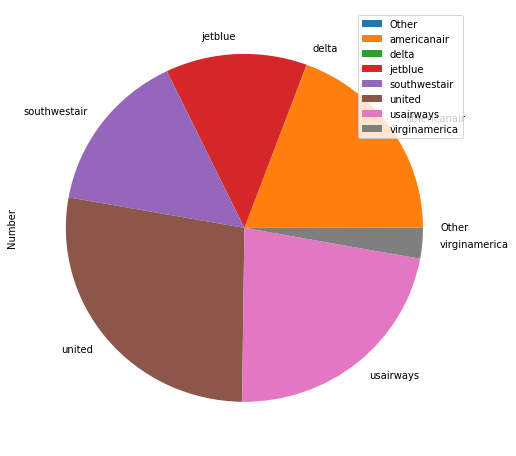

In [106]:
label =  distribution['new']
# labels = 'Other', 'americanair', 'delta', 'jetblue', 'southwestair', 'united', 'usairways', 'virginamerica'
distribution.plot.pie(y = 'Number',figsize=(8,8), labels=label)


Times of each airline been mentioned is shown in a pie chart above. United and usairway are mentioned most of more than 50 of the tweets. Delta and other companies are rarly mentioned in the given tweets.

Detailed number is shown in the above table. 

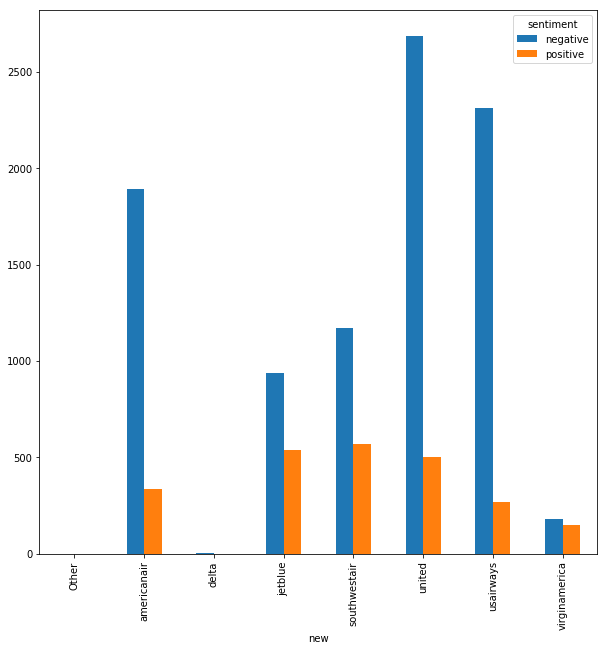

In [144]:
# satisfaction = usair_tweet.groupby(['sentiment'， 'new'])
number = usair_tweet.groupby(['new','sentiment'])
# number.size()

s = number.size()##.to_frame()

s.unstack(level=-1).plot(kind='bar', figsize = (10,10))
# s.groupby('new').plot(kind='bar')

Better understanding of the distribution can be known from the above bar chart. Negative responds are a lot more then the positive responds. Which indicates that there're more people complaining on tweeter. 

## 2) Graphical Representation 
Word Cloud has been used since there's are many words appears in the tweets, by using this technique the frequency of each word appears could be easily seen. 

### Changing the list of words into string (Generic Tweet)
The word cloud of the generic tweet, the most frequent word in these tweet can be known easily. 

In [107]:
cleaned_gtweet
# for elems in cleaned_gtweet:
#     str_ = ' '.join(elems)
str_cleaned_gtweet = ' '.join(' '.join(elems) for elems in cleaned_gtweet)
# print('\n'.join(''.join(elems) for elems in cleaned_gtweet))

In [1]:
wordcloud = WordCloud(max_font_size=300,max_words=1000,width = 4000, height = 3000,collocations=False).generate(str_cleaned_gtweet)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top airlines appears in General Tweets',fontsize=35)
plt.axis("off")
plt.show()

NameError: name 'us_df' is not defined

#### Results
The frequency of words occurs in the generic tweet can be easily noticed by their size.

Love today well night better well great work are pretty much most common words been tweeted. These are mostly positive words. Further discussion on which words could implies more on mood(positive or negative). 

### The Word Cloud of US_airline tweets 
The frequency of how each airlines are mentioned in the tweet can be known. 

In [109]:
# Change the words in list to a string for WordCloud to process
## by using the air(list) with all words start with @ or #
str_usair_tweet = ' '.join(air)

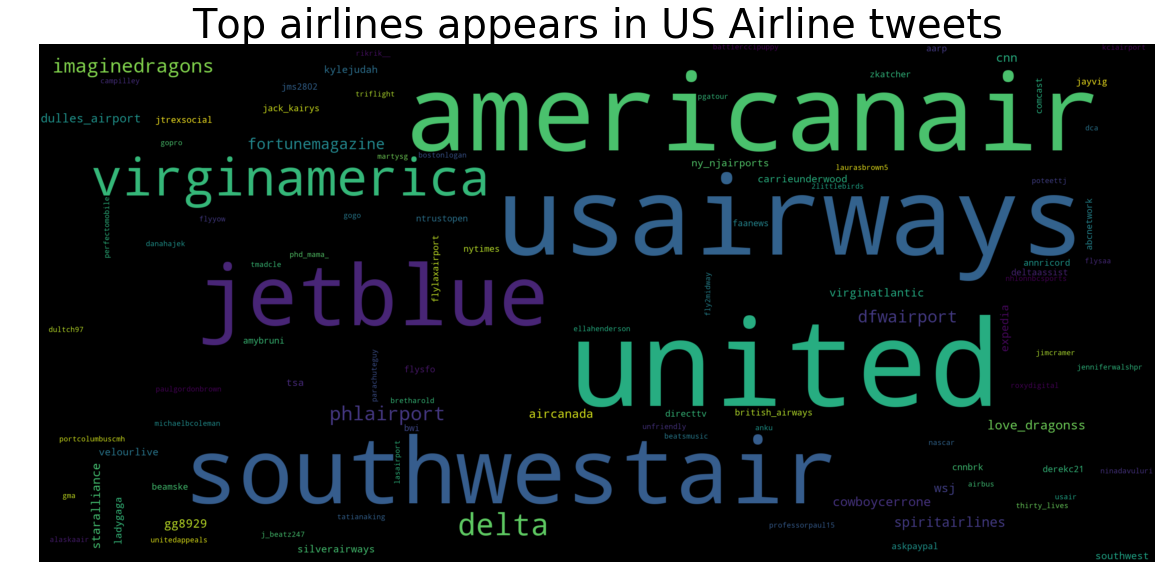

In [110]:
wordcloud = WordCloud(max_font_size=300,max_words=100,width = 2800, height = 1300,collocations=False).generate(str_usair_tweet)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top airlines appears in US Airline tweets',fontsize=40)
plt.axis("off")
plt.show()

#### Results: 
United, ameriacnair, usairways, southwestair, jetblue, virginamerican are mentioned with a decreading frequency. 

Further discussion can be made on sentiment adn negative_reason groups by companies. 

# Q3: Split and prepare the data for logistic regression 

In [111]:
#Update the dataframe with cleaned text string

gtweet['cleaned_text'] = cleaned_gtweet
# gtweet = gtweet.drop(columns="cleaned_text")
gtweet['cleaned_text2'] = gtweet['cleaned_text'].apply(lambda x: ' '.join(x))
gtweet.head()

,class,id,date,query,user,text,cleaned_text,cleaned_text2
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, awww, bummer, shoulda, david, car...",switchfoot awww bummer shoulda david carr thir...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, update, facebook, texting, cry, school...",upset update facebook texting cry school today...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, ball, managed, save, 50, res...",kenichan dived ball managed save 50 rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[feels, itchy, fire]",feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behaving]",nationwideclass behaving


### Model Setup

Setup the feature by the  words in the cleaned tweet in the generic tweets, and targets varriable to be sentiment evaulation. 

Sepeerate the cleaned generic tweet text into 30% of testing data and 70% of training data. 

Then used Logistic Regression model to train the data, and then evulate the performance of the model. Differency hyperparameter are used to tune the model to the best performance by finding a proper weight of the regulatizer int he loss function. Then the bias and varicance counld find a balance at certain hyperparameter.  

In [112]:
cv = CountVectorizer(binary=True)
# cv.fit(word_extractor(cleaned_gtweet))
cv.fit(gtweet['cleaned_text2'])
X = cv.transform(gtweet['cleaned_text2'])
y = gtweet['class']

# Q4: Model Implementation

Train a logistic regression model on the training data and apply the model to the test data to obtain an accuracy value.  Also US airline 

In [113]:
#Predict and evaluate the model and printout the accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for c in [0.01, 0.05, 0.25,0.4, 0.5, 0.75, 0.9, 1]:
    
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, clf.predict(X_test))))

Accuracy for C=0.01: 0.7153833333333334
Accuracy for C=0.05: 0.7286
Accuracy for C=0.25: 0.7351
Accuracy for C=0.4: 0.7357833333333333
Accuracy for C=0.5: 0.7352
Accuracy for C=0.75: 0.73485
Accuracy for C=0.9: 0.7339166666666667
Accuracy for C=1: 0.7334333333333334


The higherst accuracy would be 0.735778 with hyperparameter C=0.4. 

#### Evaluation on US_air_tweet

In [ ]:
# usair_tweet['cleaned_text'] = cleaned_us_air
# # gtweet = gtweet.drop(columns="cleaned_text")
# usair_tweet['cleaned_text2'] = usair_tweet['cleaned_text'].apply(lambda x: ' '.join(x))
# usair_tweet.head()

In [114]:
# First append cleaded text into the US_air_tweet dataframe 
add_cleaned_text_to_DF(usair_tweet,cleaned_us_air)

,id,sentiment,negative_reason,user,retweet_count,text,cleaned_text,cleaned_text2,new
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,"[virginamerica, youve, commercials, experience...",virginamerica youve commercials experience tacky,virginamerica
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ...",virginamerica aggressive blast obnoxious enter...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad]",virginamerica big bad,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, 30, flight, se...",virginamerica seriously pay 30 flight seats di...,virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, vx, worm]",virginamerica vx worm,virginamerica
5,5.703000e+17,positive,NaN,dhepburn,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D","[virginamerica, well, didntbut]",virginamerica well didntbut,virginamerica
6,5.702950e+17,positive,NaN,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...","[virginamerica, amazing, arrived, hour, good]",virginamerica amazing arrived hour good,virginamerica
7,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,"[virginamerica, 3, pretty, graphics, better, m...",virginamerica 3 pretty graphics better minimal...,virginamerica
8,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica This is such a great deal! Alre...,"[virginamerica, great, deal, thinking, 2nd, tr...",virginamerica great deal thinking 2nd trip aus...,virginamerica
9,5.702870e+17,positive,NaN,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,"[virginamerica, virginmedia, flying, fabulous,...",virginamerica virginmedia flying fabulous sedu...,virginamerica


In [115]:
def baseline_data(df, y_lable, X_lable = 'cleaned_text2'):
    cv = CountVectorizer(binary=True)
    cv.fit(df[X_lable])
    X = cv.transform(df[X_lable])
    y = df[y_lable]
    
    
#     cv = CountVectorizer(binary=True)
#     cv.fit(df['cleaned_text2'])
#     X = cv.transform(df['cleaned_text2'])
#     y = df['sentiment']
    
    return X,y

In [116]:
###Setup the feature by the  words in the cleaned tweet in the US_air tweets,
## and targets varriable to be sentiment evaulation.
X,y = baseline_data(usair_tweet, 'sentiment')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for c in [0.01, 0.05, 0.25,0.4, 0.5, 0.75, 0.9, 1, 10, 100]:
    
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, clf.predict(X_test))))

Accuracy for C=0.01: 0.8099913369910482
Accuracy for C=0.05: 0.8524400808547502
Accuracy for C=0.25: 0.8839156800462027
Accuracy for C=0.4: 0.8868033496967946
Accuracy for C=0.5: 0.8894022523823275
Accuracy for C=0.75: 0.8905573202425643
Accuracy for C=0.9: 0.8908460872076235
Accuracy for C=1: 0.8914236211377419
Accuracy for C=10: 0.885937048801617
Accuracy for C=100: 0.8651458273173549


Results of accuracy for US_air_tweet 
Accuracy for C=1: 0.8914236211377419

The prediction accuracy is higher than using the gerneic tweets. 

The reason might be different of the features 

for the generic tweets, the feature has size of 
    200000x159765 sparse matrix with 1060180 stroed elements;
for the US_airline_tweet, the feature set has size of 
    9178x10695 sparse matrix with 75672 stored elements. 
    
The size of feature is 14 times smaller. 

Which can be noted that overfitting is dragging the performance of the fitting model. 

## DataFrame contains only negative tweets 

In [117]:
# Selecting all the tweets with negative sentiment 
negative_usair_tweet = usair_tweet[usair_tweet['sentiment'] == 'negative']
negative_usair_tweet.head()

,id,sentiment,negative_reason,user,retweet_count,text,cleaned_text,cleaned_text2,new
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ...",virginamerica aggressive blast obnoxious enter...,virginamerica
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad]",virginamerica big bad,virginamerica
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, 30, flight, se...",virginamerica seriously pay 30 flight seats di...,virginamerica
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"[virginamerica, sfopdx, schedule, mia]",virginamerica sfopdx schedule mia,virginamerica
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,"[virginamerica, flew, nyc, sfo, week, sit, sea...",virginamerica flew nyc sfo week sit seat gentl...,virginamerica


#### Traning the multi-class model with target by Negative reasons 

In [119]:
X,y = baseline_data(negative_usair_tweet,'negative_reason')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for c in [0.01, 0.05, 0.25,0.4, 0.5, 0.75, 0.9, 1]:
    
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, prediction)))

Accuracy for C=0.01: 0.5068990559186638
Accuracy for C=0.05: 0.5831517792302106
Accuracy for C=0.25: 0.6132897603485838
Accuracy for C=0.4: 0.6172839506172839
Accuracy for C=0.5: 0.620551924473493
Accuracy for C=0.75: 0.6154684095860566
Accuracy for C=0.9: 0.6140159767610748
Accuracy for C=1: 0.6132897603485838


In [120]:
print(classification_report(y_test,prediction))

                             precision    recall  f1-score   support

                 Bad Flight       0.54      0.38      0.45       159
                 Can't Tell       0.45      0.52      0.48       359
           Cancelled Flight       0.78      0.70      0.74       261
     Customer Service Issue       0.63      0.77      0.69       875
            Damaged Luggage       1.00      0.05      0.10        20
Flight Attendant Complaints       0.50      0.26      0.34       137
    Flight Booking Problems       0.47      0.28      0.35       145
                Late Flight       0.66      0.68      0.67       517
               Lost Luggage       0.67      0.69      0.68       226
                  longlines       0.33      0.04      0.07        55

                avg / total       0.61      0.61      0.60      2754



### Improvement by Combining similar labels to a new categary 

After analysing the similarity between each negative_reason, a more general classification has been introduced. Four updated nagative reasons are listed below. 

1: Flight experience 
2: Flight Schedualing 
3: Customer service
4: Luggage Handling 

The accuracy of prediction has increased from 62% to 76% by using the approach. Thereefore, reducing the target number is able to increase the performance of the model. 

In [121]:
#reason category 
reason_type = []

for i in negative_usair_tweet['negative_reason']:
    
# Flight Experience issue
    if i ==  'Bad Flight': 
        reason_type.append(1)
    elif i == 'Flight Attendant Complaints':
        reason_type.append(1)

# Flight schedualling issue     
    elif i == 'Late Flight':
        reason_type.append(2)
    elif i == 'Cancelled Flight':
        reason_type.append(2)

#Customer service issue         
    elif i == 'longlines':
        reason_type.append(3)
    elif i == 'Customer Service Issue':
        reason_type.append(3)
    elif i == 'Flight Booking Problems':
        reason_type.append(3)

#Luggage handling issue 
    elif i == 'Damaged Luggage':
        reason_type.append(4)    
    elif i == 'Lost Luggage':
        reason_type.append(4)

# Reasons can't tell doesn't make much sense, then change it to Customer service issue to improve performance
    elif i == "Can't Tell":
        reason_type.append(3)

In [122]:
negative_usair_tweet['reason_category'] = reason_type

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
# Manipluating the columns of the dataframe 
cols = list(negative_usair_tweet.columns.values)


In [126]:
negative_usair_tweet = negative_usair_tweet[['id',
 'sentiment',
 'negative_reason','reason_category','user',
 'retweet_count',
 'text',
 'cleaned_text',
 'cleaned_text2',
 ]]

In [127]:
negative_usair_tweet.head()

,id,sentiment,negative_reason,reason_category,user,retweet_count,text,cleaned_text,cleaned_text2
1,5.703010e+17,negative,Bad Flight,1,jnardino,0,@VirginAmerica it's really aggressive to blast...,"[virginamerica, aggressive, blast, obnoxious, ...",virginamerica aggressive blast obnoxious enter...
2,5.703010e+17,negative,Can't Tell,3,jnardino,0,@VirginAmerica and it's a really big bad thing...,"[virginamerica, big, bad]",virginamerica big bad
3,5.703010e+17,negative,Can't Tell,3,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, pay, 30, flight, se...",virginamerica seriously pay 30 flight seats di...
11,5.702820e+17,negative,Late Flight,2,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"[virginamerica, sfopdx, schedule, mia]",virginamerica sfopdx schedule mia
13,5.702770e+17,negative,Bad Flight,1,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,"[virginamerica, flew, nyc, sfo, week, sit, sea...",virginamerica flew nyc sfo week sit seat gentl...


In [128]:
# By using the same features but training into less targets(4)
X,y = baseline_data(negative_usair_tweet,'reason_category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for c in [0.01, 0.05, 0.25,0.4, 0.5, 0.75, 0.9, 1]:
    
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, prediction)))

Accuracy for C=0.01: 0.6601307189542484
Accuracy for C=0.05: 0.7193173565722585
Accuracy for C=0.25: 0.7418300653594772
Accuracy for C=0.4: 0.7472766884531591
Accuracy for C=0.5: 0.7465504720406682
Accuracy for C=0.75: 0.7436456063907044
Accuracy for C=0.9: 0.7418300653594772
Accuracy for C=1: 0.7411038489469862


In [129]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          1       0.54      0.29      0.38       296
          2       0.77      0.69      0.72       778
          3       0.75      0.87      0.81      1434
          4       0.76      0.68      0.72       246

avg / total       0.73      0.74      0.73      2754



In [149]:
print (confusion_matrix(y_test,prediction))

[[  86   39  159   12]
 [  21  533  209   15]
 [  48  107 1254   25]
 [   4   15   59  168]]


By lookinga the above confusoin matrix, it can be known that reason 2 & 3 are better predicted comparing with the other ones. 

SInce the negative are defined by me, the relationship bwtween each category might be misjudged. Also maybe there're too many features interferancing the the prediction and causing overfitting which lead to the low accuracy. 

Featuring selection and better negative reason classification might give a better prediction. 

# Q5: Discussion
By reducing the number of target from 10 to 4, the prediction accuracy increased from 0.62 to 0.747. 

The low accuray iindicates that the Logictic Regression model doesn't fit for multi_class classfication. Other calssification might do better on predicting. More discussion could be done later.

### Airlines_positive_negaive analysis 

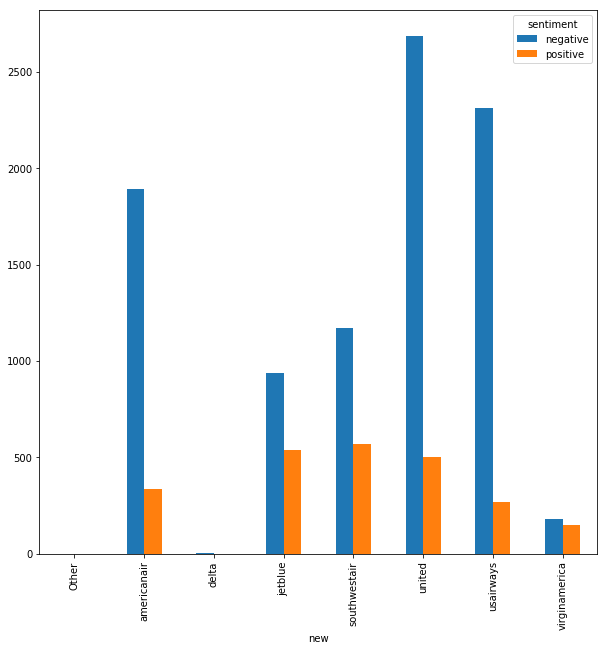

In [150]:
number = usair_tweet.groupby(['new','sentiment'])
s = number.size()##.to_frame()
s.unstack(level=-1).plot(kind='bar', figsize = (10,10))


Better understanding of the distribution can be known from the above bar chart. Negative responds are a lot more then the positive responds. Which indicates that there're more people complaining on tweeter. 

The proportation of positive to negativee comments for jetblue, southwestairm and virginamerica is higher than the other companies. 

#### Bouns By using  Bernoulli Naive Bayes

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
clf = BernoulliNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print ("Accuracy %s" 
       % ( accuracy_score(y_test, prediction)))

Accuracy 0.6630355846042121


The accuracy is 0.66 which is lower than the accuracy by using the logistic regression algorithm. 

Means that Naive Bayes is not good at multiclass classfication either. 

#### Bonnus: Hyperparameter tuning 

In [152]:
X,y = baseline_data(negative_usair_tweet,'reason_category')

In [153]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
#     X, y = binary_improved_data(all_files)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
       
        # train a logistic regression classifier
        clf = LogisticRegression(C=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

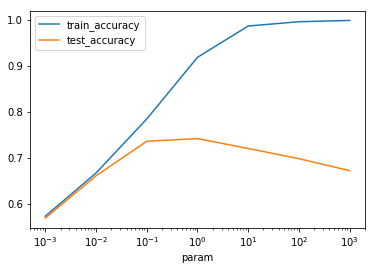

In [154]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

By observing the graph, hyperparameter of c=1.0 would lead to the best performance. 

At this parameter, the total error is minimized, by balancing the bias and variance error. 